![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadística
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [35]:
!pip install seaborn

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [37]:
beers = pd.read_csv("beers.csv")
beers.head(10)

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


In [38]:
print(beers.columns)
beers.shape

Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
       'ounces'],
      dtype='object')


(2410, 8)

## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [39]:
beers.drop(columns=['Unnamed: 0'], inplace = True)
beers

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [40]:
beers.columns.size

7

In [41]:
beers.index.size

2410

## Ejercicio 5
¿De qué tipo son los datos?

In [42]:
beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


## Ejercicio 6
Obtén en un nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, cuartiles...

In [43]:
beers.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [44]:
beers["style"].fillna("Otra categoria",inplace=True)

C:\Users\rafac\AppData\Local\Temp\ipykernel_14720\3002598333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  beers["style"].fillna("Otra categoria",inplace=True)


In [45]:
beers["style"].value_counts()


style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Wheat Ale                           1
Grisette                            1
Flanders Oud Bruin                  1
Braggot                             1
Low Alcohol Beer                    1
Name: count, Length: 100, dtype: int64

In [46]:
beers["style"].value_counts()["Otra categoria"]

np.int64(5)

## Ejercicio 8
1. Imprime por pantalla los registros desde el décimo hasta el vigésimo
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [47]:
beers.iloc[10:21:].loc[::,"name":"ounces":]

,name,style,brewery_id,ounces
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0
19,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [48]:
beers[["abv","ibu","ounces"]].iloc[10:21]

,abv,ibu,ounces
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
15,0.060,NaN,12.0
16,0.060,NaN,12.0
17,0.060,NaN,12.0
18,0.060,NaN,12.0
19,0.082,NaN,12.0


## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [49]:
beers["ounces"].value_counts()

ounces
12.0    1525
16.0     841
24.0      22
19.2      15
32.0       5
8.4        1
16.9       1
Name: count, dtype: int64

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [50]:
beers[beers["ibu"]==beers["ibu"].max()]

,abv,ibu,id,name,style,brewery_id,ounces
147,0.082,138.0,980,Bitter Bitch Imperial IPA,American Double / Imperial IPA,374,12.0


In [51]:
beers[beers["ibu"]==beers["ibu"].min()]

,abv,ibu,id,name,style,brewery_id,ounces
106,0.056,4.0,1350,Summer Solstice,Cream Ale,171,12.0
112,0.056,4.0,753,Summer Solstice Cerveza Crema (2009),Cream Ale,171,12.0
117,0.056,4.0,77,Summer Solstice (2011),Cream Ale,171,12.0


In [52]:

print(beers["ibu"].mean())
print(beers["ibu"].max(),beers["ibu"].min())
beers["ibu"] = beers["ibu"].fillna(beers["ibu"].mean())
print(beers.loc[beers["ibu"].idxmax(),"name"])
print(beers.loc[beers["ibu"].idxmin(),"name"])


42.71316725978647
138.0 4.0
Bitter Bitch Imperial IPA
Summer Solstice


In [53]:
beers["ibu"].idxmax()

147

In [54]:
beers.groupby("style")["ibu"].median()

style
Abbey Single Ale              22.000000
Altbier                       40.000000
American Adjunct Lager        15.500000
American Amber / Red Ale      42.713167
American Amber / Red Lager    42.000000
                                ...    
Tripel                        42.713167
Vienna Lager                  29.000000
Wheat Ale                     24.000000
Winter Warmer                 42.713167
Witbier                       42.713167
Name: ibu, Length: 100, dtype: float64

## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [55]:
beers["ibu"].describe()

count    2410.000000
mean       42.713167
std        19.813927
min         4.000000
25%        30.000000
50%        42.713167
75%        42.713167
max       138.000000
Name: ibu, dtype: float64

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonamiento mediante un gráfico

In [56]:
beers.corr(numeric_only=True)


,abv,ibu,id,brewery_id,ounces
abv,1.000000,0.520011,0.042811,-0.098632,0.172529
ibu,0.520011,1.000000,0.000373,-0.003549,0.039995
id,0.042811,0.000373,1.000000,-0.504030,0.100843
brewery_id,-0.098632,-0.003549,-0.504030,1.000000,-0.133762
ounces,0.172529,0.039995,0.100843,-0.133762,1.000000


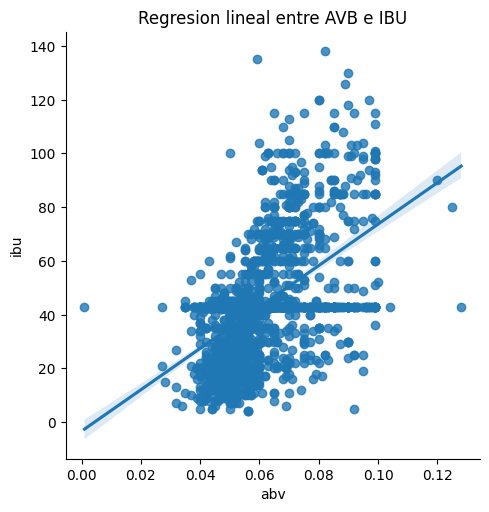

In [57]:
sns.lmplot(data=beers, x= "abv", y="ibu")
plt.title("Regresion lineal entre AVB e IBU")
plt.show()

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

<Axes: >

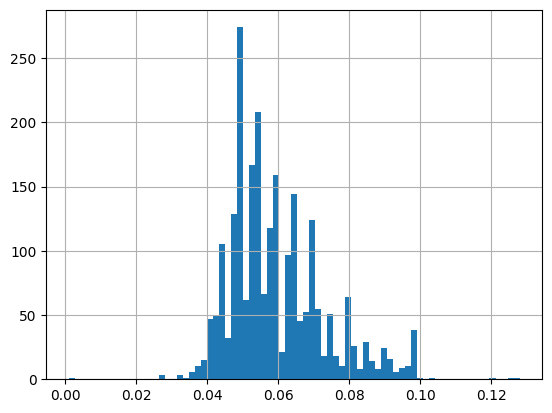

In [58]:
(beers["abv"]).hist(bins = len(beers["abv"].unique()))

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

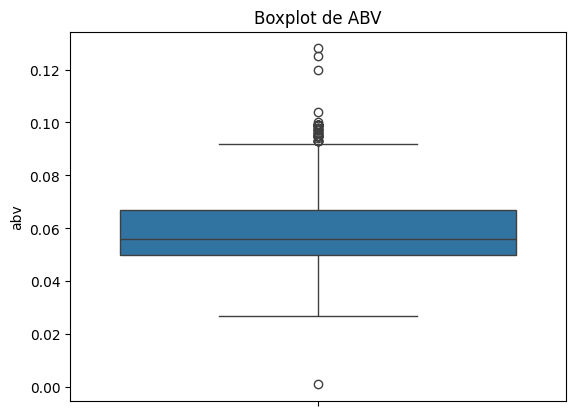

In [59]:
sns.boxplot(data = beers,y = "abv")
plt.title("Boxplot de ABV")
plt.show()

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [60]:
print(beers.groupby("style")["abv"].mean().sort_values(ascending=False))
beers.groupby("style")["ibu"].mean().sort_values(ascending=False)


style
English Barleywine        0.107667
Quadrupel (Quad)          0.104000
American Barleywine       0.099000
American Malt Liquor      0.099000
Russian Imperial Stout    0.097636
                            ...   
Berliner Weissbier        0.043909
English Dark Mild Ale     0.041500
Light Lager               0.040417
Radler                    0.040333
Low Alcohol Beer          0.001000
Name: abv, Length: 100, dtype: float64


style
American Double / Imperial IPA        78.860905
American Barleywine                   78.237722
Russian Imperial Stout                74.558137
English Barleywine                    66.666667
American Double / Imperial Pilsner    63.856584
                                        ...    
Flanders Oud Bruin                    23.000000
Abbey Single Ale                      22.000000
Radler                                19.666667
Gose                                  19.413950
Other                                 16.000000
Name: ibu, Length: 100, dtype: float64

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [61]:
cervecerias = pd.read_csv("breweries.csv")
cervecerias.head(10)

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
5,5,COAST Brewing Company,Charleston,SC
6,6,Great Divide Brewing Company,Denver,CO
7,7,Tapistry Brewing,Bridgman,MI
8,8,Big Lake Brewing,Holland,MI
9,9,The Mitten Brewing Company,Grand Rapids,MI


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra también la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [62]:
cervecerias.rename(columns={"Unnamed: 0":"brewery_id","name":"brewery_name"},inplace=True)
cervecerias

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 18
Junta los dos datasets que tienes

In [63]:
mezcla = pd.merge(beers,cervecerias)
mezcla


,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,42.713167,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,42.713167,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,42.713167,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,42.713167,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,42.713167,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.000000,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,42.713167,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,42.713167,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.000000,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

In [64]:
mezcla["state"].nunique()

51

In [65]:
mezcla["city"].nunique()

384

In [66]:
mezcla["brewery_id"].nunique()

558

## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [67]:
mezcla.columns

Index(['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces',
       'brewery_name', 'city', 'state'],
      dtype='object')

In [68]:
mezcla.groupby(["state","city"])["abv"].agg(["mean","median","max"])

mean  median    max
state city                               
AK    Anchorage   0.054200  0.0520  0.063
      Juneau      0.053000  0.0530  0.053
      Soldotna    0.058500  0.0580  0.068
      Talkeetna   0.059500  0.0585  0.065
AL    Birmingham  0.065400  0.0600  0.093
...                    ...     ...    ...
WI    Wilson      0.055000  0.0550  0.055
WV    Lewisburg   0.062000  0.0620  0.067
WY    Jackson     0.054857  0.0520  0.068
      Pinedale    0.061000  0.0610  0.072
      Sheridan    0.052833  0.0480  0.070

[401 rows x 3 columns]

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [69]:
mezcla_in = mezcla[mezcla["state"] == " IN"]
mezcla.loc[mezcla_in["ibu"].idxmax(),"name"]

'Hopkick Dropkick'

In [70]:
mezcla["state"].unique()

array([' OR', ' IN', ' CA', ' FL', ' MO', ' WA', ' CO', ' LA', ' KY',
       ' AK', ' WI', ' OH', ' OK', ' NC', ' MI', ' TX', ' CT', ' AL',
       ' MA', ' AZ', ' MN', ' ME', ' VA', ' IL', ' TN', ' MT', ' WY',
       ' NE', ' NY', ' UT', ' NJ', ' PA', ' NV', ' SC', ' GA', ' RI',
       ' IA', ' AR', ' ID', ' SD', ' DC', ' KS', ' ND', ' VT', ' MD',
       ' WV', ' HI', ' DE', ' NM', ' MS', ' NH'], dtype=object)

## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [71]:
mezcla.groupby("city")["ibu"].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.000000,135.000000,135.000000,135.000000,135.000000
Abita Springs,3.0,27.333333,21.455380,13.000000,15.000000,17.000000,34.500000,52.000000
Ada,1.0,42.713167,NaN,42.713167,42.713167,42.713167,42.713167,42.713167
Afton,4.0,43.000000,19.899749,22.000000,28.000000,45.000000,60.000000,60.000000
Airway Heights,5.0,42.713167,0.000000,42.713167,42.713167,42.713167,42.713167,42.713167
...,...,...,...,...,...,...,...,...
Woodinville,4.0,46.750000,18.643587,27.000000,39.750000,44.000000,51.000000,72.000000
Worcester,1.0,69.000000,NaN,69.000000,69.000000,69.000000,69.000000,69.000000
Yakima,2.0,54.000000,22.627417,38.000000,46.000000,54.000000,62.000000,70.000000


In [72]:
mezcla.groupby("city")["ibu"].agg(["mean","median","max","min"])

,mean,median,max,min
city,,,,
Abingdon,135.000000,135.000000,135.000000,135.000000
Abita Springs,27.333333,17.000000,52.000000,13.000000
Ada,42.713167,42.713167,42.713167,42.713167
Afton,43.000000,45.000000,60.000000,22.000000
Airway Heights,42.713167,42.713167,42.713167,42.713167
...,...,...,...,...
Woodinville,46.750000,44.000000,72.000000,27.000000
Worcester,69.000000,69.000000,69.000000,69.000000
Yakima,54.000000,54.000000,70.000000,38.000000


## Ejercicio 23
Consigue en un DataFrame todas las cervezas en cuyas cervecerías al menos haya una cerveza con un `abv` mínimo 0.07.

In [73]:
abv_fuerte = mezcla[mezcla["abv"]> 0.07]
abv_fuerte["brewery_name"].unique() #No entiendo muy bien la pregunta

array(['18th Street Brewery', '21st Amendment Brewery',
       '450 North Brewing Company', '7 Seas Brewing Company',
       'Against The Grain Brewery', 'Against the Grain Brewery',
       'Alameda Brewing', 'Anthem Brewing Company',
       'Appalachian Mountain Brewery', 'Armadillo Ale Works',
       'Aslan Brewing Company', 'Astoria Brewing Company',
       'Atwater Brewery', 'Avery Brewing Company',
       'Aviator Brewing Company', 'Back East Brewing Company',
       'Beach Brewing Company', 'Bent Brewstillery',
       'Bent Paddle Brewing Company', 'Big Bend Brewing Company',
       'Big Choice Brewing', 'Big Lake Brewing', 'Big Muddy Brewing',
       'Big Sky Brewing Company', 'Big Wood Brewery',
       'Black Acre Brewing Co.', 'Black Market Brewing Company',
       'Black Shirt Brewing Company', 'Blackrocks Brewery',
       'Blue Blood Brewing Company', 'Blue Hills Brewery',
       'Bonfire Brewing Company', 'Borderlands Brewing Company',
       'Brew Bus Brewing', 'Brewery Vi

In [74]:
abv_fuerte = mezcla[mezcla["abv"]> 0.07]

In [75]:
cervecerias_cervezas = abv_fuerte.groupby("brewery_name")["name"].value_counts()
cervecerias_cervezas

brewery_name               name                                
18th Street Brewery        Black Exodus                            1
                           Cone Crusher                            1
                           Regional Ring Of Fire                   1
                           Rise of the Phoenix                     1
                           Sex and Candy                           1
                                                                  ..
Wingman Brewers            P-51 Porter                             1
Wisconsin Brewing Company  #002 American I.P.A.                    1
Worthy Brewing Company     Lights Out Vanilla Cream Extra Stout    1
Wynkoop Brewing Company    Colorojo Imperial Red Ale               1
                           Rocky Mountain Oyster Stout             1
Name: count, Length: 401, dtype: int64

In [76]:
cervecerias_fuertes = abv_fuerte["brewery_name"].unique()
resultado = abv_fuerte[abv_fuerte["brewery_name"].isin(cervecerias_fuertes)]
resultado.groupby("brewery_name")[["name"]].value_counts()

brewery_name               name                                
18th Street Brewery        Black Exodus                            1
                           Cone Crusher                            1
                           Regional Ring Of Fire                   1
                           Rise of the Phoenix                     1
                           Sex and Candy                           1
                                                                  ..
Wingman Brewers            P-51 Porter                             1
Wisconsin Brewing Company  #002 American I.P.A.                    1
Worthy Brewing Company     Lights Out Vanilla Cream Extra Stout    1
Wynkoop Brewing Company    Colorojo Imperial Red Ale               1
                           Rocky Mountain Oyster Stout             1
Name: count, Length: 401, dtype: int64

In [83]:
cervecerias_max = mezcla.groupby("brewery_id")["abv"].max()
cervecerias_queridas = cervecerias_max[cervecerias_max>0.07].index
resultado = mezcla[mezcla["brewery_id"]].isin(cervecerias_queridas)
resultado

KeyError: "None of [Index([408, 177, 177, 177, 177, 177, 177, 177, 177, 177,\n       ...\n       199, 424, 424, 424, 424, 424, 424, 424, 424, 424],\n      dtype='int64', length=2410)] are in the [columns]"

## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [87]:
mezcla["ibu"].mean()

np.float64(42.71316725978647)

In [88]:

estados = mezcla.groupby("state")["ibu"].mean()
media_estados = estados.mean()
estados_fuertes = estados[estados>media_estados].index 
mezcla[mezcla["state"].isin(estados_fuertes)]

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,42.713167,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,42.713167,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,42.713167,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,42.713167,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,42.713167,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.000000,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,42.713167,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,42.713167,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.000000,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO
